In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
import scipy
import pandas as pd

mat = scipy.io.loadmat('data_hw5_3.mat')['R']

data = pd.DataFrame(mat, columns=None)

(2000, 2)


Text(0.5, 1.0, 'X1 vs X2, colors indicate class')

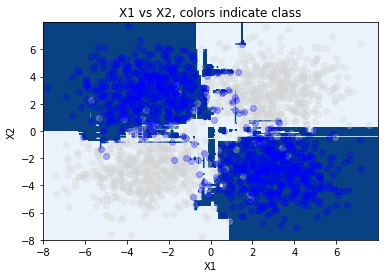

In [65]:
X = data[[0, 1]]
y = data[[2]]
print(X.shape)

clf = BaggingClassifier(n_estimators=10).fit(X, np.ravel(y))

# Plot the decision boundary

x_min, x_max = -8, 8
y_min, y_max = -8, 8
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Blues)

plt.xlabel('X1')
plt.ylabel('X2')
plt.axis("tight")

class1 = data[data[2]==1]
class2 = data[data[2]==2]

plt.scatter(class1[0], class1[1], color='lightgray', alpha = 0.3)
plt.scatter(class2[0], class2[1], color='b', alpha = 0.3)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('X1 vs X2, colors indicate class')

##### 